# Gestion des fichiers

In [213]:
from pathlib import Path
# ligne suivante pour démo uniquement
from pathlib import WindowsPath
# old module : import os.path
from datetime import datetime
import sys
import shutil # to copy files
from PIL import Image # module pillow pour les images
import csv
import pandas as pd

In [5]:
currentDir = Path('.')
currentDir

WindowsPath('.')

In [6]:
type(currentDir)

pathlib.WindowsPath

In [7]:
isinstance(currentDir, Path)

True

In [10]:
isinstance(currentDir, WindowsPath)

True

In [12]:
currDirAbs = currentDir.absolute()
currDirAbs

WindowsPath('C:/Users/Matthias/Documents/Python/Stage20200526')

In [15]:
print('\taaa\nbbbb')

	aaa
bbbb


In [16]:
print(currDirAbs)

C:\Users\Matthias\Documents\Python\Stage20200526


In [20]:
javaDirTexte = 'C:\\Users\\Matthias\\Documents\\Java'
print(javaDirTexte)
javaDir = Path(javaDirTexte)
javaDir

C:\Users\Matthias\Documents\Java


WindowsPath('C:/Users/Matthias/Documents/Java')

In [21]:
javaDirTexte = 'C:/Users/Matthias/Documents/Java'
print(javaDirTexte)
javaDir = Path(javaDirTexte)
javaDir

C:/Users/Matthias/Documents/Java


WindowsPath('C:/Users/Matthias/Documents/Java')

In [23]:
currDirAbs

WindowsPath('C:/Users/Matthias/Documents/Python/Stage20200526')

In [22]:
currDirAbs.parent

WindowsPath('C:/Users/Matthias/Documents/Python')

In [25]:
for d in currDirAbs.parents:
    print(d)

C:\Users\Matthias\Documents\Python
C:\Users\Matthias\Documents
C:\Users\Matthias
C:\Users
C:\


In [26]:
currDirAbs.is_dir()

True

In [27]:
currDirAbs.is_file()

False

In [30]:
for f in currDirAbs.iterdir():
    print(f, f.is_dir(), f.is_file())

C:\Users\Matthias\Documents\Python\Stage20200526\.git True False
C:\Users\Matthias\Documents\Python\Stage20200526\.ipynb_checkpoints True False
C:\Users\Matthias\Documents\Python\Stage20200526\carremagic_ex.py False True
C:\Users\Matthias\Documents\Python\Stage20200526\csv True False
C:\Users\Matthias\Documents\Python\Stage20200526\DatetimeData.ipynb False True
C:\Users\Matthias\Documents\Python\Stage20200526\Fonctions.ipynb False True
C:\Users\Matthias\Documents\Python\Stage20200526\MagicSquare.ipynb False True
C:\Users\Matthias\Documents\Python\Stage20200526\magiksquare.py False True
C:\Users\Matthias\Documents\Python\Stage20200526\PremiersPas.ipynb False True
C:\Users\Matthias\Documents\Python\Stage20200526\Python2020intro.pdf False True
C:\Users\Matthias\Documents\Python\Stage20200526\Python2020intro.pptx False True
C:\Users\Matthias\Documents\Python\Stage20200526\squaremagik.png False True
C:\Users\Matthias\Documents\Python\Stage20200526\timezone-map.jpg False True
C:\Users\Matthi

In [32]:
currDirAbs.name

'Stage20200526'

In [33]:
[ f.name for f in currDirAbs.iterdir() if f.is_file() ]

['carremagic_ex.py',
 'DatetimeData.ipynb',
 'Fonctions.ipynb',
 'MagicSquare.ipynb',
 'magiksquare.py',
 'PremiersPas.ipynb',
 'Python2020intro.pdf',
 'Python2020intro.pptx',
 'squaremagik.png',
 'timezone-map.jpg',
 'TraitementTexte.ipynb',
 'Untitled.ipynb']

In [35]:
currDirAbs.stat()

os.stat_result(st_mode=16895, st_ino=49258120924629243, st_dev=3053894559, st_nlink=1, st_uid=0, st_gid=0, st_size=4096, st_atime=1590668637, st_mtime=1590668637, st_ctime=1590475272)

In [36]:
currDirAbs.stat().st_size

4096

In [40]:
datetime.fromtimestamp(currDirAbs.stat().st_mtime)

datetime.datetime(2020, 5, 28, 14, 28, 13, 404245)

In [44]:
for f in currDirAbs.iterdir():
    stats = f.stat()
    print(f.name, stats.st_size, stats.st_size/1024, datetime.fromtimestamp(stats.st_mtime), sep=' : ')

.git : 4096 : 4.0 : 2020-05-28 13:33:01.165568
.ipynb_checkpoints : 4096 : 4.0 : 2020-05-28 13:35:56.698807
carremagic_ex.py : 2504 : 2.4453125 : 2020-05-05 10:09:46.231998
csv : 0 : 0.0 : 2020-05-28 13:31:59.731249
DatetimeData.ipynb : 38848 : 37.9375 : 2020-05-28 12:47:29.050062
Fonctions.ipynb : 24546 : 23.970703125 : 2020-05-27 14:52:23.851852
MagicSquare.ipynb : 11619 : 11.3466796875 : 2020-05-27 16:57:50.639196
magiksquare.py : 1954 : 1.908203125 : 2020-05-27 16:52:32.617095
PremiersPas.ipynb : 69048 : 67.4296875 : 2020-05-27 08:53:56.661262
Python2020intro.pdf : 526701 : 514.3564453125 : 2020-05-26 13:28:11.730926
Python2020intro.pptx : 572686 : 559.263671875 : 2020-05-26 13:27:48.252712
squaremagik.png : 16716 : 16.32421875 : 2020-05-27 22:34:14.347044
timezone-map.jpg : 708955 : 692.3388671875 : 2019-07-29 09:18:52.197358
TraitementTexte.ipynb : 14387 : 14.0498046875 : 2020-05-28 12:45:40.413826
Untitled.ipynb : 11455 : 11.1865234375 : 2020-05-28 14:35:57.371187


In [45]:
print(10**3, 2**10)

1000 1024


In [47]:
prefixes = ['K', 'M', 'G', 'T', 'P', 'E', 'Z', 'Y']
for i in range(1,9):
    print(prefixes[i-1], 10**(3*i), 2**(10*i))

K 1000 1024
M 1000000 1048576
G 1000000000 1073741824
T 1000000000000 1099511627776
P 1000000000000000 1125899906842624
E 1000000000000000000 1152921504606846976
Z 1000000000000000000000 1180591620717411303424
Y 1000000000000000000000000 1208925819614629174706176


In [49]:
4*10**12 / 2**40

3.637978807091713

In [50]:
sorted(currDirAbs.iterdir())

[WindowsPath('C:/Users/Matthias/Documents/Python/Stage20200526/.git'),
 WindowsPath('C:/Users/Matthias/Documents/Python/Stage20200526/.ipynb_checkpoints'),
 WindowsPath('C:/Users/Matthias/Documents/Python/Stage20200526/carremagic_ex.py'),
 WindowsPath('C:/Users/Matthias/Documents/Python/Stage20200526/csv'),
 WindowsPath('C:/Users/Matthias/Documents/Python/Stage20200526/DatetimeData.ipynb'),
 WindowsPath('C:/Users/Matthias/Documents/Python/Stage20200526/Fonctions.ipynb'),
 WindowsPath('C:/Users/Matthias/Documents/Python/Stage20200526/MagicSquare.ipynb'),
 WindowsPath('C:/Users/Matthias/Documents/Python/Stage20200526/magiksquare.py'),
 WindowsPath('C:/Users/Matthias/Documents/Python/Stage20200526/PremiersPas.ipynb'),
 WindowsPath('C:/Users/Matthias/Documents/Python/Stage20200526/Python2020intro.pdf'),
 WindowsPath('C:/Users/Matthias/Documents/Python/Stage20200526/Python2020intro.pptx'),
 WindowsPath('C:/Users/Matthias/Documents/Python/Stage20200526/squaremagik.png'),
 WindowsPath('C:/Use

In [52]:
def tailleFichier(path):
    return path.stat().st_size

In [53]:
tailleFichier(currDirAbs)

4096

In [54]:
sorted(currDirAbs.iterdir(), key=tailleFichier)

[WindowsPath('C:/Users/Matthias/Documents/Python/Stage20200526/csv'),
 WindowsPath('C:/Users/Matthias/Documents/Python/Stage20200526/magiksquare.py'),
 WindowsPath('C:/Users/Matthias/Documents/Python/Stage20200526/carremagic_ex.py'),
 WindowsPath('C:/Users/Matthias/Documents/Python/Stage20200526/.git'),
 WindowsPath('C:/Users/Matthias/Documents/Python/Stage20200526/.ipynb_checkpoints'),
 WindowsPath('C:/Users/Matthias/Documents/Python/Stage20200526/MagicSquare.ipynb'),
 WindowsPath('C:/Users/Matthias/Documents/Python/Stage20200526/TraitementTexte.ipynb'),
 WindowsPath('C:/Users/Matthias/Documents/Python/Stage20200526/Untitled.ipynb'),
 WindowsPath('C:/Users/Matthias/Documents/Python/Stage20200526/squaremagik.png'),
 WindowsPath('C:/Users/Matthias/Documents/Python/Stage20200526/Fonctions.ipynb'),
 WindowsPath('C:/Users/Matthias/Documents/Python/Stage20200526/DatetimeData.ipynb'),
 WindowsPath('C:/Users/Matthias/Documents/Python/Stage20200526/PremiersPas.ipynb'),
 WindowsPath('C:/Users/M

In [55]:
sorted(currDirAbs.iterdir(), key=lambda p: p.stat().st_size)

[WindowsPath('C:/Users/Matthias/Documents/Python/Stage20200526/csv'),
 WindowsPath('C:/Users/Matthias/Documents/Python/Stage20200526/magiksquare.py'),
 WindowsPath('C:/Users/Matthias/Documents/Python/Stage20200526/carremagic_ex.py'),
 WindowsPath('C:/Users/Matthias/Documents/Python/Stage20200526/.git'),
 WindowsPath('C:/Users/Matthias/Documents/Python/Stage20200526/.ipynb_checkpoints'),
 WindowsPath('C:/Users/Matthias/Documents/Python/Stage20200526/MagicSquare.ipynb'),
 WindowsPath('C:/Users/Matthias/Documents/Python/Stage20200526/TraitementTexte.ipynb'),
 WindowsPath('C:/Users/Matthias/Documents/Python/Stage20200526/squaremagik.png'),
 WindowsPath('C:/Users/Matthias/Documents/Python/Stage20200526/Untitled.ipynb'),
 WindowsPath('C:/Users/Matthias/Documents/Python/Stage20200526/Fonctions.ipynb'),
 WindowsPath('C:/Users/Matthias/Documents/Python/Stage20200526/DatetimeData.ipynb'),
 WindowsPath('C:/Users/Matthias/Documents/Python/Stage20200526/PremiersPas.ipynb'),
 WindowsPath('C:/Users/M

In [57]:
list(currentDir.iterdir())

[WindowsPath('.git'),
 WindowsPath('.ipynb_checkpoints'),
 WindowsPath('carremagic_ex.py'),
 WindowsPath('csv'),
 WindowsPath('DatetimeData.ipynb'),
 WindowsPath('Fichiers.ipynb'),
 WindowsPath('Fonctions.ipynb'),
 WindowsPath('MagicSquare.ipynb'),
 WindowsPath('magiksquare.py'),
 WindowsPath('PremiersPas.ipynb'),
 WindowsPath('Python2020intro.pdf'),
 WindowsPath('Python2020intro.pptx'),
 WindowsPath('squaremagik.png'),
 WindowsPath('timezone-map.jpg'),
 WindowsPath('TraitementTexte.ipynb')]

In [60]:
fichiersTriesParDateDesc = sorted(currDirAbs.iterdir(), key=lambda p: p.stat().st_mtime, reverse=True)
fichiersTriesParDateDesc

[WindowsPath('C:/Users/Matthias/Documents/Python/Stage20200526/Fichiers.ipynb'),
 WindowsPath('C:/Users/Matthias/Documents/Python/Stage20200526/.git'),
 WindowsPath('C:/Users/Matthias/Documents/Python/Stage20200526/.ipynb_checkpoints'),
 WindowsPath('C:/Users/Matthias/Documents/Python/Stage20200526/csv'),
 WindowsPath('C:/Users/Matthias/Documents/Python/Stage20200526/DatetimeData.ipynb'),
 WindowsPath('C:/Users/Matthias/Documents/Python/Stage20200526/TraitementTexte.ipynb'),
 WindowsPath('C:/Users/Matthias/Documents/Python/Stage20200526/squaremagik.png'),
 WindowsPath('C:/Users/Matthias/Documents/Python/Stage20200526/MagicSquare.ipynb'),
 WindowsPath('C:/Users/Matthias/Documents/Python/Stage20200526/magiksquare.py'),
 WindowsPath('C:/Users/Matthias/Documents/Python/Stage20200526/Fonctions.ipynb'),
 WindowsPath('C:/Users/Matthias/Documents/Python/Stage20200526/PremiersPas.ipynb'),
 WindowsPath('C:/Users/Matthias/Documents/Python/Stage20200526/Python2020intro.pdf'),
 WindowsPath('C:/User

In [61]:
[ (p.name, datetime.fromtimestamp(p.stat().st_mtime)) for p in fichiersTriesParDateDesc ]

[('Fichiers.ipynb', datetime.datetime(2020, 5, 28, 15, 19, 57, 381345)),
 ('.git', datetime.datetime(2020, 5, 28, 15, 9, 2, 475928)),
 ('.ipynb_checkpoints', datetime.datetime(2020, 5, 28, 15, 8, 16, 360211)),
 ('csv', datetime.datetime(2020, 5, 28, 13, 31, 59, 731249)),
 ('DatetimeData.ipynb', datetime.datetime(2020, 5, 28, 12, 47, 29, 50062)),
 ('TraitementTexte.ipynb', datetime.datetime(2020, 5, 28, 12, 45, 40, 413826)),
 ('squaremagik.png', datetime.datetime(2020, 5, 27, 22, 34, 14, 347044)),
 ('MagicSquare.ipynb', datetime.datetime(2020, 5, 27, 16, 57, 50, 639196)),
 ('magiksquare.py', datetime.datetime(2020, 5, 27, 16, 52, 32, 617095)),
 ('Fonctions.ipynb', datetime.datetime(2020, 5, 27, 14, 52, 23, 851852)),
 ('PremiersPas.ipynb', datetime.datetime(2020, 5, 27, 8, 53, 56, 661262)),
 ('Python2020intro.pdf', datetime.datetime(2020, 5, 26, 13, 28, 11, 730926)),
 ('Python2020intro.pptx', datetime.datetime(2020, 5, 26, 13, 27, 48, 252712)),
 ('carremagic_ex.py', datetime.datetime(202

In [62]:
# manip de fichiers dans le répertoire CSV
# (données provenant de https://data.toulouse-metropole.fr/)
csvDir = currDirAbs.joinpath("csv")
csvDir

WindowsPath('C:/Users/Matthias/Documents/Python/Stage20200526/csv')

In [63]:
fichierMeteo = currDirAbs.joinpath('csv','meteo','05-station-meteo-piscine-nakache.csv')
fichierMeteo

WindowsPath('C:/Users/Matthias/Documents/Python/Stage20200526/csv/meteo/05-station-meteo-piscine-nakache.csv')

In [65]:
list(csvDir.glob('**/*.csv'))

[WindowsPath('C:/Users/Matthias/Documents/Python/Stage20200526/csv/flore/inventaire-de-la-flore-sauvage-en-milieu-urbain-ville-de-toulouse.csv'),
 WindowsPath('C:/Users/Matthias/Documents/Python/Stage20200526/csv/meteo/05-station-meteo-piscine-nakache.csv'),
 WindowsPath('C:/Users/Matthias/Documents/Python/Stage20200526/csv/meteo/08-station-meteo-basso-cambo.csv'),
 WindowsPath('C:/Users/Matthias/Documents/Python/Stage20200526/csv/meteo/13-station-meteo-pech-david.csv'),
 WindowsPath('C:/Users/Matthias/Documents/Python/Stage20200526/csv/meteo/17-station-meteo-fenouillet.csv'),
 WindowsPath('C:/Users/Matthias/Documents/Python/Stage20200526/csv/meteo/41-station-meteo-avenue-de-casselardit.csv'),
 WindowsPath('C:/Users/Matthias/Documents/Python/Stage20200526/csv/movies/data_007_actors.csv'),
 WindowsPath('C:/Users/Matthias/Documents/Python/Stage20200526/csv/movies/data_007_movie.csv'),
 WindowsPath('C:/Users/Matthias/Documents/Python/Stage20200526/csv/movies/data_007_stars.csv')]

In [66]:
fichierFlore = csvDir.joinpath('flore', 'inventaire-de-la-flore-sauvage-en-milieu-urbain-ville-de-toulouse.csv')
fichierFlore

WindowsPath('C:/Users/Matthias/Documents/Python/Stage20200526/csv/flore/inventaire-de-la-flore-sauvage-en-milieu-urbain-ville-de-toulouse.csv')

In [68]:
nouveauNom = 'flore.csv'
nouveauFichierFlore = fichierFlore.parent.joinpath(nouveauNom)
nouveauFichierFlore

WindowsPath('C:/Users/Matthias/Documents/Python/Stage20200526/csv/flore/flore.csv')

In [70]:
print(fichierFlore.exists())
print(nouveauFichierFlore.exists())

True
False


In [71]:
fichierFlore.rename(nouveauFichierFlore)

In [72]:
print(fichierFlore.exists())
print(nouveauFichierFlore.exists())

False
True


In [73]:
dirOpendataToulouse = csvDir.joinpath('opendata-toulouse')

In [74]:
dirOpendataToulouse.exists()

False

In [75]:
dirOpendataToulouse.mkdir()

In [76]:
dirOpendataToulouse.exists()

True

In [77]:
arboresence = currentDir.joinpath('bidon','dummy','silly')
arboresence

WindowsPath('bidon/dummy/silly')

In [96]:
arboresence.mkdir(parents=True, exist_ok=True)

In [ ]:
# source : fichiers de csv/meteo
# destination : dirOpendataToulouse

In [112]:
for f in csvDir.glob('meteo/*.csv'):
    newF = dirOpendataToulouse.joinpath(f.name)
    try:
        f.rename(newF)
        print(f, '->', newF)
    except FileExistsError:
        print("Echec déplacement du fichier :", f, file=sys.stderr)

C:\Users\Matthias\Documents\Python\Stage20200526\csv\meteo\08-station-meteo-basso-cambo.csv -> C:\Users\Matthias\Documents\Python\Stage20200526\csv\opendata-toulouse\08-station-meteo-basso-cambo.csv
C:\Users\Matthias\Documents\Python\Stage20200526\csv\meteo\13-station-meteo-pech-david.csv -> C:\Users\Matthias\Documents\Python\Stage20200526\csv\opendata-toulouse\13-station-meteo-pech-david.csv
C:\Users\Matthias\Documents\Python\Stage20200526\csv\meteo\17-station-meteo-fenouillet.csv -> C:\Users\Matthias\Documents\Python\Stage20200526\csv\opendata-toulouse\17-station-meteo-fenouillet.csv
C:\Users\Matthias\Documents\Python\Stage20200526\csv\meteo\41-station-meteo-avenue-de-casselardit.csv -> C:\Users\Matthias\Documents\Python\Stage20200526\csv\opendata-toulouse\41-station-meteo-avenue-de-casselardit.csv


Echec déplacement du fichier : C:\Users\Matthias\Documents\Python\Stage20200526\csv\meteo\05-station-meteo-piscine-nakache.csv


In [113]:
f = Path('csv/meteo/05-station-meteo-piscine-nakache.csv')
f

WindowsPath('csv/meteo/05-station-meteo-piscine-nakache.csv')

In [114]:
f.unlink()

In [115]:
f.exists()

False

In [117]:
f.parent.rmdir()

In [121]:
# OSError: [WinError 145] Le répertoire n’est pas vide
# dirOpendataToulouse.rmdir()

In [124]:
f = Path('csv/opendata-toulouse/05-station-meteo-piscine-nakache.csv')
shutil.copy(f, csvDir)

'C:\\Users\\Matthias\\Documents\\Python\\Stage20200526\\csv\\05-station-meteo-piscine-nakache.csv'

In [129]:
copyOpenData = csvDir.joinpath('copy-opendata')
shutil.copytree(dirOpendataToulouse, copyOpenData)

WindowsPath('C:/Users/Matthias/Documents/Python/Stage20200526/csv/copy-opendata')

In [130]:
currDirAbs

WindowsPath('C:/Users/Matthias/Documents/Python/Stage20200526')

In [131]:
dirImgMontagne = currDirAbs.joinpath('images', 'montagne')
dirImgMontagne

WindowsPath('C:/Users/Matthias/Documents/Python/Stage20200526/images/montagne')

In [133]:
image = dirImgMontagne.joinpath('vignemale.png')
image

WindowsPath('C:/Users/Matthias/Documents/Python/Stage20200526/images/montagne/vignemale.png')

# Entrées/Sorties
- fichiers
- clavier/console
- base de données
- réseau/cloud

In [149]:
# f est un descripteur de fichier qui permet de lire séquentiellement le fichier
f = open('csv/movies/data_007_movie.csv', encoding='UTF-8')  # erreur potentielle
print(repr(f))
entetes = f.readline()   # erreur potentielle
lignes = f.readlines()   # erreur potentielle
f.close()                # erreur potentielle
print("Entêtes : ", entetes)
lignes

<_io.TextIOWrapper name='csv/movies/data_007_movie.csv' mode='r' encoding='UTF-8'>
Entêtes :  title;title_fr;year;duration;director



['Dr. No;James Bond 007 contre Dr. No;1962;110;Terence Young\n',
 'From Russia with Love;Bons baisers de Russie;1963;115;Terence Young\n',
 'Goldfinger;;1964;110;Guy Hamilton\n',
 'Thunderball;Opération Tonnerre;1965;130;Terence Young\n',
 'You Only Live Twice;On ne vit que deux fois;1967;117;Lewis Gilbert\n',
 'On Her Majestys Secret Service;Au service secret de Sa Majesté;1969;142;Peter R. Hunt\n',
 'Diamonds Are Forever;Les diamants sont éternels;1971;101;Guy Hamilton\n',
 'Live and Let Die;Vivre et laisser mourir;1973;121;Guy Hamilton\n',
 "The Man with the Golden Gun;L'homme au pistolet d'or;1974;125;Guy Hamilton\n",
 "The Spy Who Loved Me;L'espion qui m'aimait;1977;125;Lewis Gilbert\n",
 'Moonraker;;1979;126;Lewis Gilbert\n',
 'For Your Eyes Only;Rien que pour vos yeux;1981;127;John Glen\n',
 'Octopussy;;1983;131;John Glen\n',
 'A View to a Kill;Dangereusement vôtre;1985;131;John Glen\n',
 "The Living Daylights;Tuer n'est pas jouer;1987;130;John Glen\n",
 'Licence to Kill;Permis 

In [150]:
# f est un descripteur de fichier qui permet de lire séquentiellement le fichier
with open('csv/movies/data_007_movie.csv', encoding='UTF-8') as f: # erreur potentielle
    print(repr(f))
    print("Fermé :", f.closed)
    entetes = f.readline()   # erreur potentielle
    lignes = f.readlines()   # erreur potentielle
    # f.close() # fait automatiquement quelque que soit le scenario
print("Fermé :", f.closed)
print("Entêtes : ", entetes)
lignes

<_io.TextIOWrapper name='csv/movies/data_007_movie.csv' mode='r' encoding='UTF-8'>
Fermé : False
Fermé : True
Entêtes :  title;title_fr;year;duration;director



['Dr. No;James Bond 007 contre Dr. No;1962;110;Terence Young\n',
 'From Russia with Love;Bons baisers de Russie;1963;115;Terence Young\n',
 'Goldfinger;;1964;110;Guy Hamilton\n',
 'Thunderball;Opération Tonnerre;1965;130;Terence Young\n',
 'You Only Live Twice;On ne vit que deux fois;1967;117;Lewis Gilbert\n',
 'On Her Majestys Secret Service;Au service secret de Sa Majesté;1969;142;Peter R. Hunt\n',
 'Diamonds Are Forever;Les diamants sont éternels;1971;101;Guy Hamilton\n',
 'Live and Let Die;Vivre et laisser mourir;1973;121;Guy Hamilton\n',
 "The Man with the Golden Gun;L'homme au pistolet d'or;1974;125;Guy Hamilton\n",
 "The Spy Who Loved Me;L'espion qui m'aimait;1977;125;Lewis Gilbert\n",
 'Moonraker;;1979;126;Lewis Gilbert\n',
 'For Your Eyes Only;Rien que pour vos yeux;1981;127;John Glen\n',
 'Octopussy;;1983;131;John Glen\n',
 'A View to a Kill;Dangereusement vôtre;1985;131;John Glen\n',
 "The Living Daylights;Tuer n'est pas jouer;1987;130;John Glen\n",
 'Licence to Kill;Permis 

In [171]:
f = open('csv/movies/data_007_movie.csv', encoding='UTF-8')

In [172]:
contenu = list(f)
contenu

['title;title_fr;year;duration;director\n',
 'Dr. No;James Bond 007 contre Dr. No;1962;110;Terence Young\n',
 'From Russia with Love;Bons baisers de Russie;1963;115;Terence Young\n',
 'Goldfinger;;1964;110;Guy Hamilton\n',
 'Thunderball;Opération Tonnerre;1965;130;Terence Young\n',
 'You Only Live Twice;On ne vit que deux fois;1967;117;Lewis Gilbert\n',
 'On Her Majestys Secret Service;Au service secret de Sa Majesté;1969;142;Peter R. Hunt\n',
 'Diamonds Are Forever;Les diamants sont éternels;1971;101;Guy Hamilton\n',
 'Live and Let Die;Vivre et laisser mourir;1973;121;Guy Hamilton\n',
 "The Man with the Golden Gun;L'homme au pistolet d'or;1974;125;Guy Hamilton\n",
 "The Spy Who Loved Me;L'espion qui m'aimait;1977;125;Lewis Gilbert\n",
 'Moonraker;;1979;126;Lewis Gilbert\n',
 'For Your Eyes Only;Rien que pour vos yeux;1981;127;John Glen\n',
 'Octopussy;;1983;131;John Glen\n',
 'A View to a Kill;Dangereusement vôtre;1985;131;John Glen\n',
 "The Living Daylights;Tuer n'est pas jouer;1987

In [173]:
f.close()

In [156]:
with open('csv/movies/data_007_movie.csv', encoding='UTF-8') as f:
    for ligne in f:
        print(ligne, end='')


title;title_fr;year;duration;director
Dr. No;James Bond 007 contre Dr. No;1962;110;Terence Young
From Russia with Love;Bons baisers de Russie;1963;115;Terence Young
Goldfinger;;1964;110;Guy Hamilton
Thunderball;Opération Tonnerre;1965;130;Terence Young
You Only Live Twice;On ne vit que deux fois;1967;117;Lewis Gilbert
On Her Majestys Secret Service;Au service secret de Sa Majesté;1969;142;Peter R. Hunt
Diamonds Are Forever;Les diamants sont éternels;1971;101;Guy Hamilton
Live and Let Die;Vivre et laisser mourir;1973;121;Guy Hamilton
The Man with the Golden Gun;L'homme au pistolet d'or;1974;125;Guy Hamilton
The Spy Who Loved Me;L'espion qui m'aimait;1977;125;Lewis Gilbert
Moonraker;;1979;126;Lewis Gilbert
For Your Eyes Only;Rien que pour vos yeux;1981;127;John Glen
Octopussy;;1983;131;John Glen
A View to a Kill;Dangereusement vôtre;1985;131;John Glen
The Living Daylights;Tuer n'est pas jouer;1987;130;John Glen
Licence to Kill;Permis de tuer;1989;133;John Glen
GoldenEye;;1995;130;Martin 

In [158]:
movies = contenu[1:]
movies

['Dr. No;James Bond 007 contre Dr. No;1962;110;Terence Young\n',
 'From Russia with Love;Bons baisers de Russie;1963;115;Terence Young\n',
 'Goldfinger;;1964;110;Guy Hamilton\n',
 'Thunderball;Opération Tonnerre;1965;130;Terence Young\n',
 'You Only Live Twice;On ne vit que deux fois;1967;117;Lewis Gilbert\n',
 'On Her Majestys Secret Service;Au service secret de Sa Majesté;1969;142;Peter R. Hunt\n',
 'Diamonds Are Forever;Les diamants sont éternels;1971;101;Guy Hamilton\n',
 'Live and Let Die;Vivre et laisser mourir;1973;121;Guy Hamilton\n',
 "The Man with the Golden Gun;L'homme au pistolet d'or;1974;125;Guy Hamilton\n",
 "The Spy Who Loved Me;L'espion qui m'aimait;1977;125;Lewis Gilbert\n",
 'Moonraker;;1979;126;Lewis Gilbert\n',
 'For Your Eyes Only;Rien que pour vos yeux;1981;127;John Glen\n',
 'Octopussy;;1983;131;John Glen\n',
 'A View to a Kill;Dangereusement vôtre;1985;131;John Glen\n',
 "The Living Daylights;Tuer n'est pas jouer;1987;130;John Glen\n",
 'Licence to Kill;Permis 

In [159]:
ligne = '     \t  Toulouse ville rose   \t   \n'
ligne.strip()

'Toulouse ville rose'

In [161]:
movies2 = [ ligne.rstrip() for ligne in movies ]
movies2

['Dr. No;James Bond 007 contre Dr. No;1962;110;Terence Young',
 'From Russia with Love;Bons baisers de Russie;1963;115;Terence Young',
 'Goldfinger;;1964;110;Guy Hamilton',
 'Thunderball;Opération Tonnerre;1965;130;Terence Young',
 'You Only Live Twice;On ne vit que deux fois;1967;117;Lewis Gilbert',
 'On Her Majestys Secret Service;Au service secret de Sa Majesté;1969;142;Peter R. Hunt',
 'Diamonds Are Forever;Les diamants sont éternels;1971;101;Guy Hamilton',
 'Live and Let Die;Vivre et laisser mourir;1973;121;Guy Hamilton',
 "The Man with the Golden Gun;L'homme au pistolet d'or;1974;125;Guy Hamilton",
 "The Spy Who Loved Me;L'espion qui m'aimait;1977;125;Lewis Gilbert",
 'Moonraker;;1979;126;Lewis Gilbert',
 'For Your Eyes Only;Rien que pour vos yeux;1981;127;John Glen',
 'Octopussy;;1983;131;John Glen',
 'A View to a Kill;Dangereusement vôtre;1985;131;John Glen',
 "The Living Daylights;Tuer n'est pas jouer;1987;130;John Glen",
 'Licence to Kill;Permis de tuer;1989;133;John Glen',
 

In [163]:
ligne = movies2[0]
ligne

'Dr. No;James Bond 007 contre Dr. No;1962;110;Terence Young'

In [164]:
ligne.split(';')

['Dr. No', 'James Bond 007 contre Dr. No', '1962', '110', 'Terence Young']

In [165]:
contenu

['title;title_fr;year;duration;director\n',
 'Dr. No;James Bond 007 contre Dr. No;1962;110;Terence Young\n',
 'From Russia with Love;Bons baisers de Russie;1963;115;Terence Young\n',
 'Goldfinger;;1964;110;Guy Hamilton\n',
 'Thunderball;Opération Tonnerre;1965;130;Terence Young\n',
 'You Only Live Twice;On ne vit que deux fois;1967;117;Lewis Gilbert\n',
 'On Her Majestys Secret Service;Au service secret de Sa Majesté;1969;142;Peter R. Hunt\n',
 'Diamonds Are Forever;Les diamants sont éternels;1971;101;Guy Hamilton\n',
 'Live and Let Die;Vivre et laisser mourir;1973;121;Guy Hamilton\n',
 "The Man with the Golden Gun;L'homme au pistolet d'or;1974;125;Guy Hamilton\n",
 "The Spy Who Loved Me;L'espion qui m'aimait;1977;125;Lewis Gilbert\n",
 'Moonraker;;1979;126;Lewis Gilbert\n',
 'For Your Eyes Only;Rien que pour vos yeux;1981;127;John Glen\n',
 'Octopussy;;1983;131;John Glen\n',
 'A View to a Kill;Dangereusement vôtre;1985;131;John Glen\n',
 "The Living Daylights;Tuer n'est pas jouer;1987

In [174]:
contenu.insert(-2, 'Mourir peut attendre;No Time to Die;2020;163;Cary Joji Fukunaga\n')

In [175]:
contenu

['title;title_fr;year;duration;director\n',
 'Dr. No;James Bond 007 contre Dr. No;1962;110;Terence Young\n',
 'From Russia with Love;Bons baisers de Russie;1963;115;Terence Young\n',
 'Goldfinger;;1964;110;Guy Hamilton\n',
 'Thunderball;Opération Tonnerre;1965;130;Terence Young\n',
 'You Only Live Twice;On ne vit que deux fois;1967;117;Lewis Gilbert\n',
 'On Her Majestys Secret Service;Au service secret de Sa Majesté;1969;142;Peter R. Hunt\n',
 'Diamonds Are Forever;Les diamants sont éternels;1971;101;Guy Hamilton\n',
 'Live and Let Die;Vivre et laisser mourir;1973;121;Guy Hamilton\n',
 "The Man with the Golden Gun;L'homme au pistolet d'or;1974;125;Guy Hamilton\n",
 "The Spy Who Loved Me;L'espion qui m'aimait;1977;125;Lewis Gilbert\n",
 'Moonraker;;1979;126;Lewis Gilbert\n',
 'For Your Eyes Only;Rien que pour vos yeux;1981;127;John Glen\n',
 'Octopussy;;1983;131;John Glen\n',
 'A View to a Kill;Dangereusement vôtre;1985;131;John Glen\n',
 "The Living Daylights;Tuer n'est pas jouer;1987

In [181]:
# mode w : création en écriture ou en écrasant si existe
# mode a : append sur fichier existant ou création sinon
# mode x : exclusif i.e. création seulement si n'existe pas, sinon erreur
with open('csv/movies/data_007_movie_copy.csv', mode='w', encoding='UTF-8') as f:
    print(repr(f))
    f.writelines(contenu)
    # f.close() # automatique en sortie de with

<_io.TextIOWrapper name='csv/movies/data_007_movie_copy.csv' mode='w' encoding='UTF-8'>


In [184]:
ls *.jpg

 Le volume dans le lecteur C s'appelle OS
 Le num‚ro de s‚rie du volume est B606-BB9F

 R‚pertoire de C:\Users\Matthias\Documents\Python\Stage20200526

29/07/2019  09:18           708ÿ955 timezone-map.jpg
               1 fichier(s)          708ÿ955 octets
               0 R‚p(s)  14ÿ519ÿ205ÿ888 octets libres


In [185]:
pwd

'C:\\Users\\Matthias\\Documents\\Python\\Stage20200526'

In [195]:
f = open('timezone-map.jpg', mode='rb') # ouverture en lecture binaire
f

<_io.BufferedReader name='timezone-map.jpg'>

In [198]:
data = f.read(4)
data

b'\xff\xd8\xff\xe0'

In [197]:
f.read?

In [199]:
f.close()

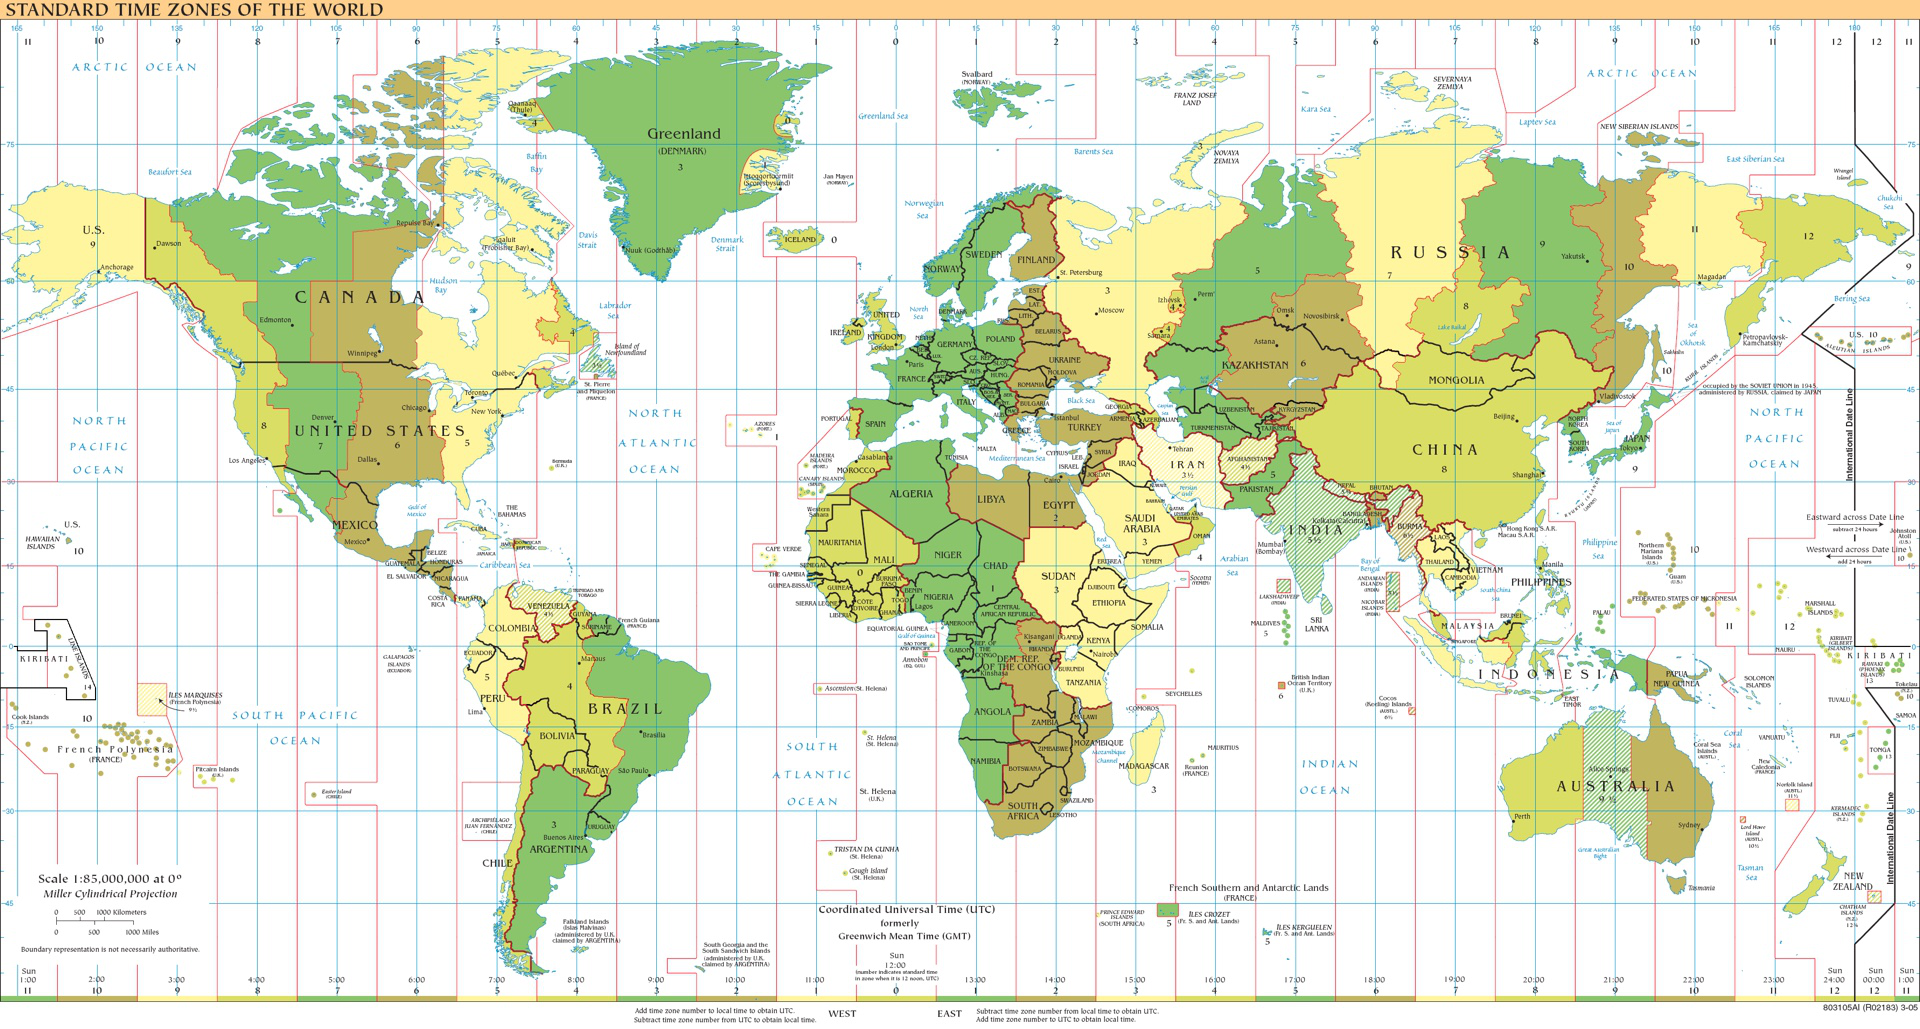

In [204]:
img = Image.open('timezone-map.jpg')
img

In [209]:
# csv :  reader/writer (liste) ou DictReader/DictWriter (dict)
f = open('csv/movies/data_007_movie.csv', encoding='UTF-8')
r = csv.reader(f, delimiter=';')

In [210]:
for ligne in r:
    print(ligne)

['title', 'title_fr', 'year', 'duration', 'director']
['Dr. No', 'James Bond 007 contre Dr. No', '1962', '110', 'Terence Young']
['From Russia with Love', 'Bons baisers de Russie', '1963', '115', 'Terence Young']
['Goldfinger', '', '1964', '110', 'Guy Hamilton']
['Thunderball', 'Opération Tonnerre', '1965', '130', 'Terence Young']
['You Only Live Twice', 'On ne vit que deux fois', '1967', '117', 'Lewis Gilbert']
['On Her Majestys Secret Service', 'Au service secret de Sa Majesté', '1969', '142', 'Peter R. Hunt']
['Diamonds Are Forever', 'Les diamants sont éternels', '1971', '101', 'Guy Hamilton']
['Live and Let Die', 'Vivre et laisser mourir', '1973', '121', 'Guy Hamilton']
['The Man with the Golden Gun', "L'homme au pistolet d'or", '1974', '125', 'Guy Hamilton']
['The Spy Who Loved Me', "L'espion qui m'aimait", '1977', '125', 'Lewis Gilbert']
['Moonraker', '', '1979', '126', 'Lewis Gilbert']
['For Your Eyes Only', 'Rien que pour vos yeux', '1981', '127', 'John Glen']
['Octopussy', '',

In [211]:
f.close()

In [ ]:
# pandas fait partie de Python Scientifique (scipy) : numpy (calcul), pandas (data, I/O), matplotlib (graphiques) 

In [215]:
data = pd.read_csv('csv/movies/data_007_movie.csv', encoding='UTF-8', sep=';')
data

,title,title_fr,year,duration,director
0,Dr. No,James Bond 007 contre Dr. No,1962,110,Terence Young
1,From Russia with Love,Bons baisers de Russie,1963,115,Terence Young
2,Goldfinger,NaN,1964,110,Guy Hamilton
3,Thunderball,Opération Tonnerre,1965,130,Terence Young
4,You Only Live Twice,On ne vit que deux fois,1967,117,Lewis Gilbert
5,On Her Majestys Secret Service,Au service secret de Sa Majesté,1969,142,Peter R. Hunt
6,Diamonds Are Forever,Les diamants sont éternels,1971,101,Guy Hamilton
7,Live and Let Die,Vivre et laisser mourir,1973,121,Guy Hamilton
8,The Man with the Golden Gun,L'homme au pistolet d'or,1974,125,Guy Hamilton
9,The Spy Who Loved Me,L'espion qui m'aimait,1977,125,Lewis Gilbert


In [216]:
data.title

0                             Dr. No
1              From Russia with Love
2                         Goldfinger
3                        Thunderball
4                You Only Live Twice
5     On Her Majestys Secret Service
6               Diamonds Are Forever
7                   Live and Let Die
8        The Man with the Golden Gun
9               The Spy Who Loved Me
10                         Moonraker
11                For Your Eyes Only
12                         Octopussy
13                  A View to a Kill
14              The Living Daylights
15                   Licence to Kill
16                         GoldenEye
17               Tomorrow Never Dies
18           The World Is Not Enough
19                   Die Another Day
20                     Casino Royale
21                 Quantum of Solace
22                           Skyfall
23                           Spectre
24             Never Say Never Again
25                     Casino Royale
Name: title, dtype: object

In [217]:
data.year

0     1962
1     1963
2     1964
3     1965
4     1967
5     1969
6     1971
7     1973
8     1974
9     1977
10    1979
11    1981
12    1983
13    1985
14    1987
15    1989
16    1995
17    1997
18    1999
19    2002
20    2006
21    2008
22    2012
23    2015
24    1983
25    1983
Name: year, dtype: int64

In [218]:
min(data.year)

1962

In [219]:
data.year.min()

1962

In [220]:
data.year >= 2000

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19     True
20     True
21     True
22     True
23     True
24    False
25    False
Name: year, dtype: bool

In [224]:
movies2000 = data[data.year >= 2000]
movies2000

,title,title_fr,year,duration,director
19,Die Another Day,Meurs un autre jour,2002,133,Lee Tamahori
20,Casino Royale,NaN,2006,144,Martin Campbell
21,Quantum of Solace,NaN,2008,106,Marc Forster
22,Skyfall,NaN,2012,143,Sam Mendes
23,Spectre,007 Spectre,2015,148,Sam Mendes


In [223]:
data[data.title.str.startswith('S')]

,title,title_fr,year,duration,director
22,Skyfall,NaN,2012,143,Sam Mendes
23,Spectre,007 Spectre,2015,148,Sam Mendes


In [225]:
movies2000.to_excel('movies.xlsx')